In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from utils import Constellation, tle_from_orbital_parameters, starlink_constellation
from astropy import units as u
from lsst.sims.utils import _angularSeparation

import sqlite3
import pandas as pd


In [2]:
satellites = starlink_constellation()

In [3]:
constellation = Constellation(satellites)

In [4]:
mjd = 59853.9856438209
constellation.update_mjd(mjd)

In [5]:
mjd = 59853.9856438209+.01
constellation.check_pointing(60., 0., mjd)

0.14285714285714285

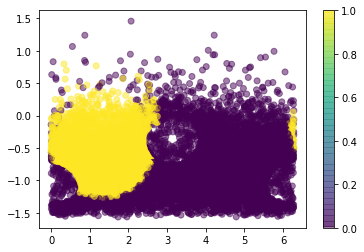

In [6]:
plt.scatter(constellation.azimuth_rad,constellation.altitudes_rad, c=constellation.eclip, alpha=.5)
plt.colorbar()

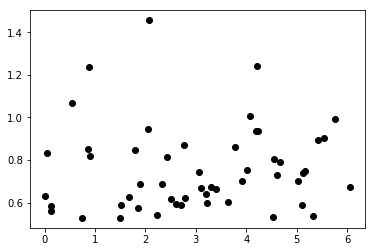

In [7]:
good = constellation.above_alt_limit
plt.plot(constellation.azimuth_rad[good],constellation.altitudes_rad[good], 'ko')

In [8]:
# Let's look at what happens in a 30s advance
constellation.update_mjd(59853.9856438209)
dt = 5./3600./24.
good = constellation.above_alt_limit.copy()
az1 = constellation.azimuth_rad[good] +0
alt1 = constellation.altitudes_rad[good] + 0


constellation.update_mjd(59853.9856438209 + dt)

az2 = constellation.azimuth_rad[good] +0
alt2 = constellation.altitudes_rad[good] + 0



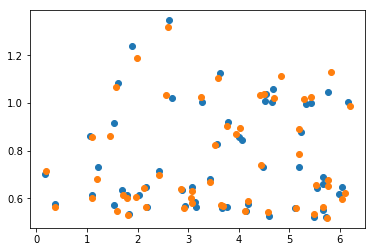

In [9]:
plt.plot(az1, alt1, 'o')
plt.plot(az2, alt2, 'o')

In [10]:
dist =  _angularSeparation(az1, alt1, az2, alt2)

In [11]:
np.degrees(dist)

array([ 1.82955276,  3.1508562 ,  3.38491747,  1.98529732,  2.4026545 ,
        3.23187092,  2.21868729,  0.79561462,  1.45212312,  1.54880228,
        0.88218809,  1.14375393,  1.1792219 ,  1.22490363,  1.36435228,
        0.89652718,  0.73481102,  1.40042566,  1.70935907,  0.9623228 ,
        1.14173535,  1.42527419,  0.99502035,  1.10205934,  1.00892345,
        0.85325466,  1.49530018,  1.46063634,  0.81479589,  0.8195562 ,
        1.46675713,  1.57859609,  0.89857705,  0.91022759,  1.23187777,
        1.41262706,  1.23424688,  0.90368009,  0.94891331,  0.90749237,
        0.93374489,  4.99924477,  5.31959337,  3.02509642,  3.97691943,
        3.58124452,  4.35117421,  3.51727378,  3.97353063,  3.4093748 ,
        3.29094864,  3.52087118,  3.59897535,  4.81177419,  3.03809117])

In [12]:
# OK, so some of these things are moving 30 degrees on sky in 30 seconds. So we literally have to do 1-2s timesteps to get them.


In [13]:
conn = sqlite3.connect('baseline_v1.3_10yrs.db')
df = pd.read_sql('select altitude,azimuth,observationstartmjd from summaryallprops where night=150;', conn)
conn.close()

# let's see if we can just advance the epoch
constellation.advance_epoch(advance=100)

In [14]:
# %%time
in_fovs = []
for val in df.values:
    in_fovs.append(constellation.check_pointing(val[0], val[1], val[2]))

In [15]:
# ok, so 12 hours to do this on a full year. 

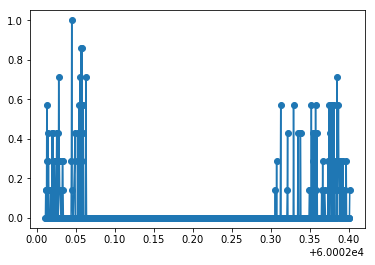

In [18]:
plt.plot(df['observationStartMJD'], in_fovs, 'o-')

In [17]:
np.where(np.array(in_fovs) > 0)[0].size/np.size(in_fovs)

0.11311672683513839